In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargamos nuestro dataset
df = pd.read_csv('games_clean.csv', sep=',')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_expanded,platform_group
0,WII SPORTS,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54,Everyone,Nintendo
1,SUPER MARIO BROS,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Pending,Nintendo
2,MARIO KART WII,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52,Everyone,Nintendo
3,WII SPORTS RESORT,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77,Everyone,Nintendo
4,POKEMON RED/POKEMON BLUE,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,Pending,Nintendo


In [3]:
# Inspeccionamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16444 non-null  float64
 12  rating_expanded  16444 non-null  object 
 13  platform_group   16444 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


*Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?*

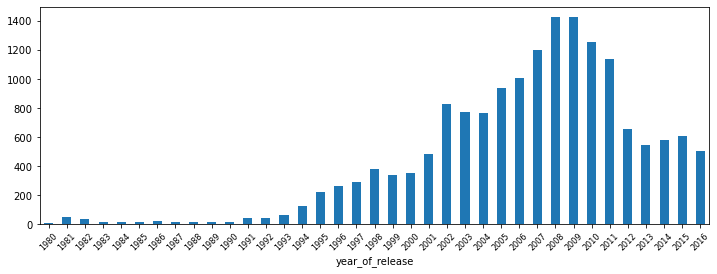

In [4]:
games_by_year = df.groupby('year_of_release')['name'].count()
plt.figure(figsize=(12,4))
plt.xticks(fontsize=8)
games_by_year.plot(
    x = 'year_of_release',
    kind='bar',
    rot = 45
)
plt.show()

#### Consideramos que desde 1995 los datos comienzan a ser significativos. Antes de esta fecha fueron muy pocos los juegos que había en el mercado

*Observa cómo varían las ventas de una plataforma a otra.*

- Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.
- Busca las plataformas que solían ser populares pero que ahora no tienen ventas.
- ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?


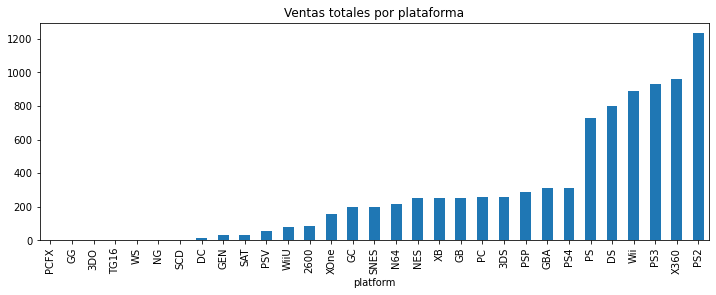

In [5]:
# Plataformas individuales con mayores ventas totales

df_by_sales_platform = df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales')
df_by_sales_platform.plot(
    x = 'platform',
    figsize = (12,4),
    kind = 'bar',
    legend = False,
    title = 'Ventas totales por plataforma'
)

plt.show()

#### Las plataformas que más ventas totales han tenido hasta la fecha del estudio son PS2, X360, PS3, Wii y DS

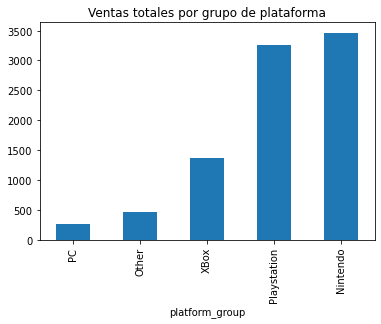

In [6]:
# Grupos de plataformas con mayores ventas totales

df_by_sales_platform_group = df.groupby('platform_group')['total_sales'].sum().reset_index().sort_values(by='total_sales')
df_by_sales_platform_group.plot(
    kind = 'bar',
    x = 'platform_group',
    title = 'Ventas totales por grupo de plataforma',
    legend = False
)
plt.show()

#### Agrupando las plataformas en las compañías detrás de cada plataforma podemos ver que Playstation y Nintendo liderean el mercado

In [7]:
# Seleccionamos las 5 plataformas con más ventas
top_5_sales_platforms = df_by_sales_platform.sort_values(by='total_sales', ascending = False).head(5)
top_5_list = top_5_sales_platforms['platform'].tolist() 
top_5_list

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [8]:
# Filtramos el dataframe original por las top 5 plataformas

top_5_df = df[df['platform'].isin(top_5_list)]

In [9]:
# Agrupar por año y plataforma
yearly_sales = top_5_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

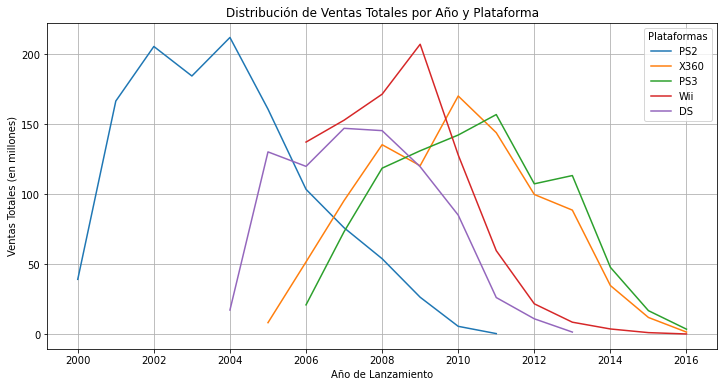

In [10]:
import matplotlib.pyplot as plt

# Crear un gráfico de líneas para comparar plataformas
plt.figure(figsize=(12, 6))

for platform in top_5_list:
    platform_data = yearly_sales[yearly_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Distribución de Ventas Totales por Año y Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Plataformas')
plt.grid(True)
plt.show()


In [11]:
df[(df['platform']== 'DS') & (df['year_of_release']== 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_expanded,platform_group
